In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

plt.style.use('fivethirtyeight')

In [2]:
#ordered by date of appointment
files = ['Thomas.csv',
         'Ginsburg.csv',
         'Breyer.csv',
         'Roberts.csv',
         'Alito.csv',
         'Sotomayor.csv',
         'Kagan.csv',
         'Gorsuch.csv',
         'Kavanaugh.csv']
names = ['Thomas',
         'Ginsburg',
         'Breyer',
         'Roberts',
         'Alito',
         'Sotomayor',
         'Kagan',
         'Gorsuch',
         'Kavanaugh']

In [7]:
pd.read_csv('data/clean/Thomas.csv')

,term,caseName,justiceId,speakerName,text,cleanText,duration,decidedBy,arguedOn,petitioner,respondent,docket,grantedOn,decidedOn,justice,partyWinning,direction,majority,vote
0,1991,United States v. Fordice,108,Clarence Thomas,"Mr. Goodman, is there any distinction between ...",mr goodman be there any distinction between a ...,52.23,Rehnquist Court,"Nov 13, 1991",United States,Fordice,90-1205,NaN,"Jun 26, 1992",108.0,1.0,0.0,0.0,0
1,1991,Evans v. United States,108,Clarence Thomas,"Why isn't it pertinent, Mr. Bryson? Our statut...",why be not it pertinent mr bryson our statute ...,37.48,Rehnquist Court,"Dec 9, 1991",Evans,United States,90-6105,NaN,"May 26, 1992",108.0,0.0,0.0,0.0,1
2,1991,Union Bank v. Wolas,108,Clarence Thomas,"Yes, Mr. Graham, if there... should we look at...",yes mr graham if there should we look at the f...,29.81,Rehnquist Court,"Nov 5, 1991",Union Bank,Wolas,90-1491,NaN,"Dec 11, 1991",108.0,1.0,0.0,0.0,0
3,1991,"Morales v. Trans World Airlines, Inc.",108,Clarence Thomas,"I'd like to ask you one question, counsel. You...",I would like to ask you one question counsel y...,49.42,Rehnquist Court,"Mar 3, 1992","Morales, Attorney General of Texas","Trans World Airlines, Inc.",90-1604,"Nov 27, 1991","Jun 1, 1992",108.0,0.0,0.0,0.0,1
4,1991,Hudson v. McMillian,108,Clarence Thomas,NaN,NaN,0.00,Rehnquist Court,"Nov 13, 1991",Hudson,McMillian,90-6531,NaN,"Feb 25, 1992",108.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2018,Biestek v. Berryhill,108,Clarence Thomas,NaN,NaN,0.00,Case pending,"Dec 4, 2018",Michael J. Biestek,"Nancy A. Berryhill, Deputy Commissioner for Op...",17-1184,"Jun 25, 2018",NaN,108.0,0.0,0.0,0.0,1
1823,2018,Mount Lemmon Fire District v. Guido,108,Clarence Thomas,NaN,NaN,0.00,Roberts Court,"Oct 1, 2018",Mount Lemmon Fire District,"John Guido, et al.",17-587,"Feb 26, 2018","Nov 6, 2018",108.0,0.0,0.0,0.0,1
1824,2018,"Lamps Plus, Inc. v. Varela",108,Clarence Thomas,NaN,NaN,0.00,Case pending,"Oct 29, 2018","Lamps Plus, Inc., et al.",Frank Varela,17-988,"Apr 30, 2018",NaN,108.0,1.0,0.0,0.0,0
1825,2018,Tennessee Wine and Spirits Retailers Associati...,108,Clarence Thomas,NaN,NaN,0.00,Case pending,"Jan 16, 2019",Tennessee Wine and Spirits Retailers Association,"Zackary W. Blair, Interim Director of the Tenn...",18-96,"Sep 27, 2018",NaN,108.0,0.0,0.0,0.0,1


Text(0.5, 1.0, '# Cases per Justice')

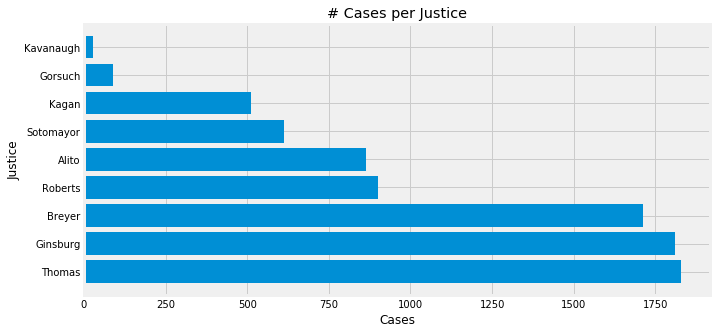

In [9]:
cases = []
for file in files:
    fpath = 'data/clean/%s' % file
    df = pd.read_csv(fpath)
    cases.append(df.shape[0])

fig, ax = plt.subplots(figsize=(10, 5))

ax.barh(names, cases)
ax.set_xlabel('Cases')
ax.set_ylabel('Justice')
ax.set_title('# Cases per Justice')

In [3]:
words = []
for file in files:
    ct = 0
    fpath = 'data/clean/%s' % file
    df = pd.read_csv(fpath)
    for i, row in df.iterrows():
        ct += len(str(row['text']).split())
    words.append(ct)

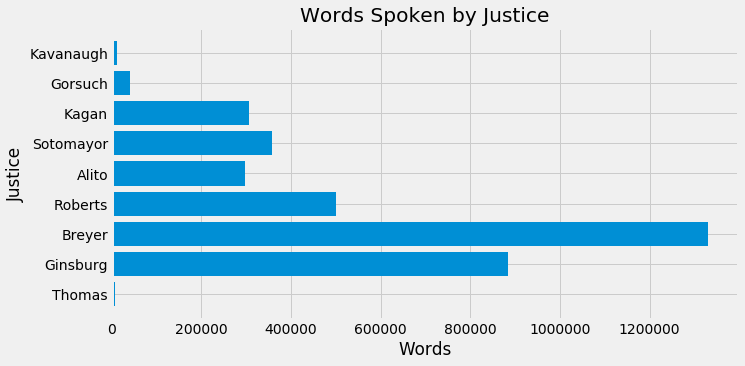

In [67]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.barh(names, words)
ax.set_xlabel('Words')
ax.set_ylabel('Justice')
ax.set_title('Words Spoken by Justice')
#fig.savefig('img/words_spoken.png')

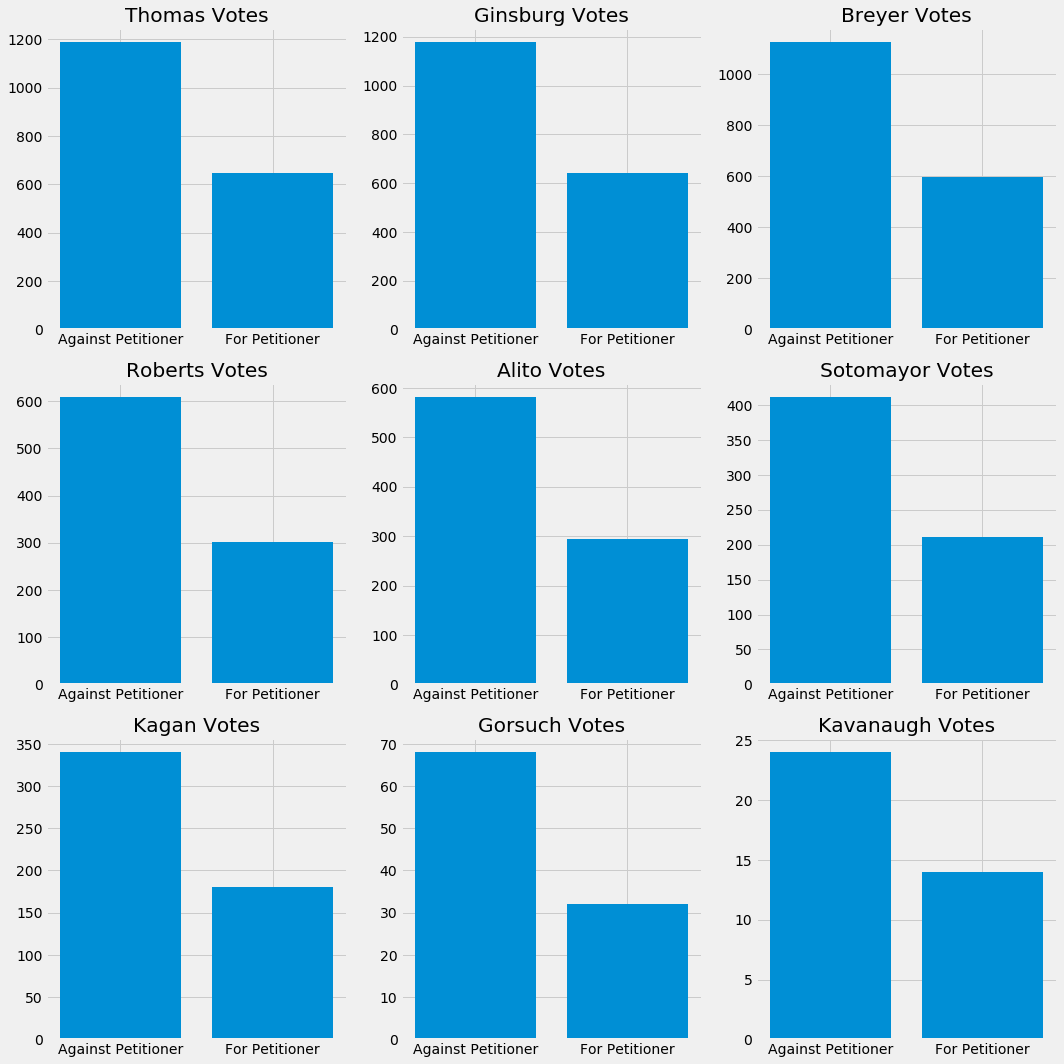

In [73]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, file in enumerate(files):
    fpath = 'data/clean/%s' % file
    df = pd.read_csv(fpath)
    votes = df['vote'].value_counts()
    ax[i // 3][i % 3].bar(votes.index, votes.values)
    ax[i // 3][i % 3].set_title('%s Votes' % names[i])
    ax[i // 3][i % 3].set_xticks([0, 1])
    ax[i // 3][i % 3].set_xticklabels(['Against Petitioner', 'For Petitioner'])
fig.tight_layout()
fig.savefig('img/vote_distribution.png')

In [97]:
whole_df = pd.DataFrame()

for file in files:
    fpath = 'data/clean/%s' % file
    df = pd.read_csv(fpath)
    whole_df = whole_df.append(df)

[Text(0, 0, 'Against Petitioner'), Text(0, 0, 'For Petitioner')]

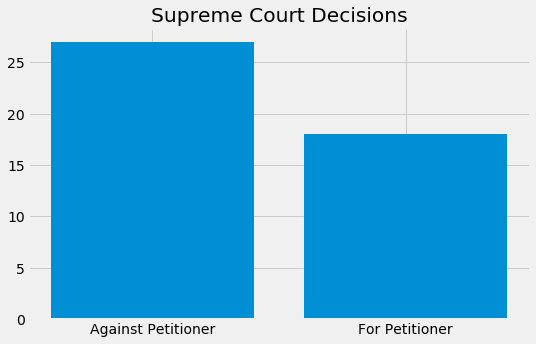

In [101]:
total_votes = whole_df[whole_df['term'] == 2018].groupby('docket')['vote'].sum()

respondent_wins = len(total_votes[total_votes < 5])
petitioner_wins = len(total_votes[total_votes >= 5])

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar([0, 1], [respondent_wins, petitioner_wins])
ax.set_title('Supreme Court Decisions')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Against Petitioner', 'For Petitioner'])